LAPTOP_PRICE_PREDICTION

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("laptop_data.csv")
dataset.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
dataset.shape

(1303, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
dataset.duplicated

<bound method DataFrame.duplicated of       Unnamed: 0 Company            TypeName  Inches  \
0              0   Apple           Ultrabook    13.3   
1              1   Apple           Ultrabook    13.3   
2              2      HP            Notebook    15.6   
3              3   Apple           Ultrabook    15.4   
4              4   Apple           Ultrabook    13.3   
...          ...     ...                 ...     ...   
1298        1298  Lenovo  2 in 1 Convertible    14.0   
1299        1299  Lenovo  2 in 1 Convertible    13.3   
1300        1300  Lenovo            Notebook    14.0   
1301        1301      HP            Notebook    15.6   
1302        1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retin

In [7]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1298    False
1299    False
1300    False
1301    False
1302    False
Length: 1303, dtype: bool

In [8]:
dataset.duplicated().sum()

0

In [9]:
dataset.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [10]:
dataset.drop(columns = ["Unnamed: 0"] , inplace = True)

In [11]:
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [12]:
dataset["Ram"].str.replace("GB"," ")

0        8 
1        8 
2        8 
3       16 
4        8 
       ... 
1298     4 
1299    16 
1300     2 
1301     6 
1302     4 
Name: Ram, Length: 1303, dtype: object

In [13]:
dataset["Ram"] = dataset["Ram"].str.replace("GB"," ")
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [14]:
dataset["Weight"].str.replace("kg"," ")

0       1.37 
1       1.34 
2       1.86 
3       1.83 
4       1.37 
        ...  
1298     1.8 
1299     1.3 
1300     1.5 
1301    2.19 
1302     2.2 
Name: Weight, Length: 1303, dtype: object

In [15]:
dataset["Weight"] = dataset["Weight"].str.replace("kg"," ")
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [16]:
dataset["Ram"].astype("int32")
dataset["Weight"].astype("float32")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [17]:
dataset["Ram"] = dataset["Ram"].astype("int32")
dataset["Weight"] = dataset["Weight"].astype("float32")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


UNIVARIATE ANALYSIS

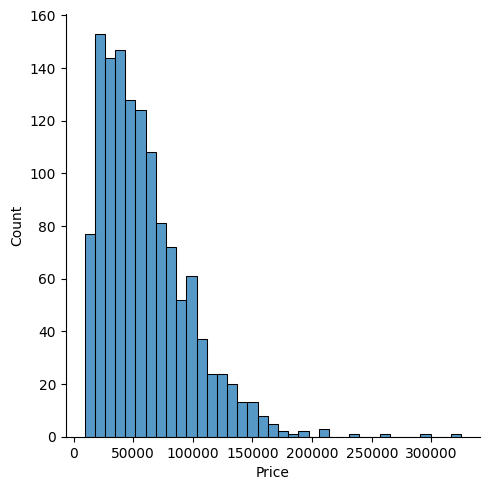

In [18]:
sns.displot(dataset["Price"])
plt.show()
                

In [19]:
dataset["Company"].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

<Axes: xlabel='Company'>

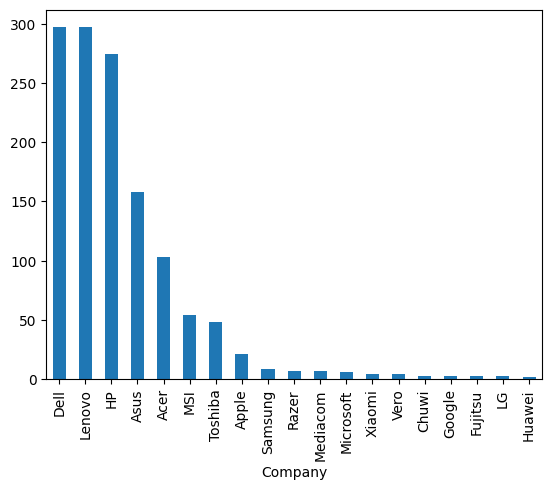

In [20]:
dataset["Company"].value_counts().plot(kind="bar")

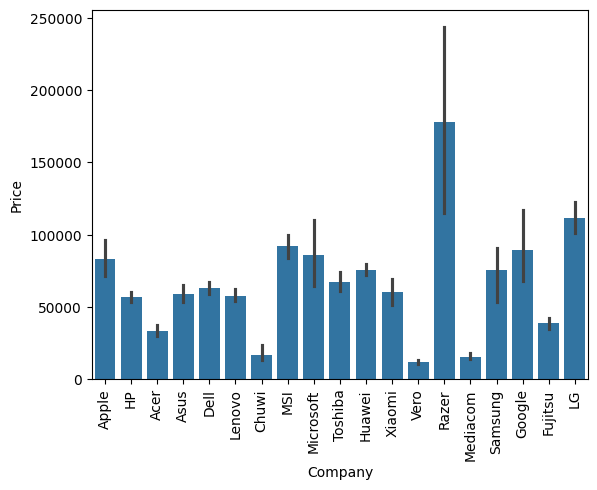

In [21]:
sns.barplot( x = "Company" , y = "Price" , data = dataset)
plt.xticks( rotation = "vertical")
plt.show()

In [22]:
dataset["TypeName"].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

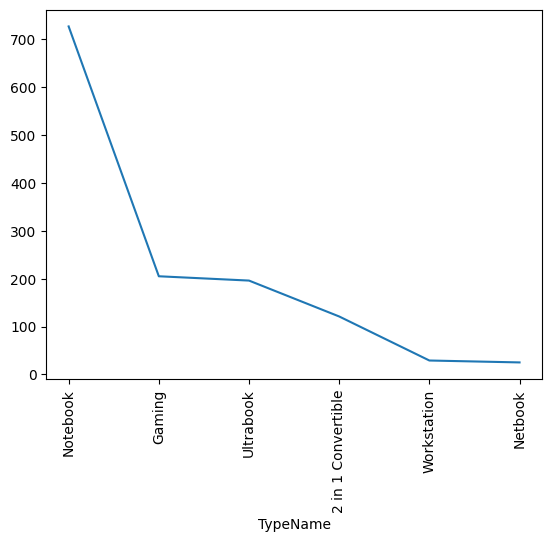

In [23]:
dataset["TypeName"].value_counts().plot(kind="line")
plt.xticks( rotation = "vertical")
plt.show()

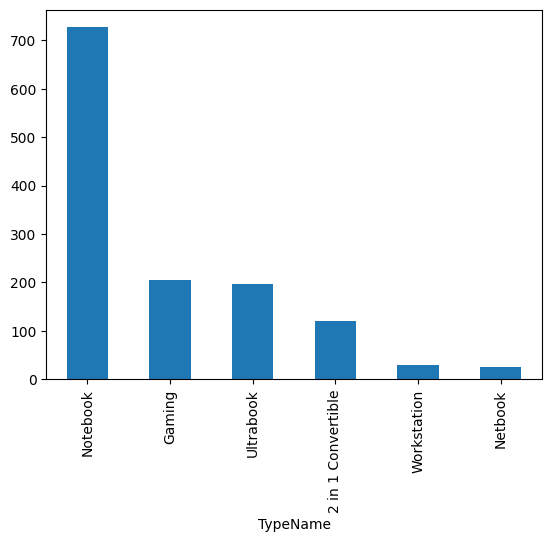

In [24]:
dataset["TypeName"].value_counts().plot(kind="bar")
plt.xticks( rotation = "vertical")
plt.show()

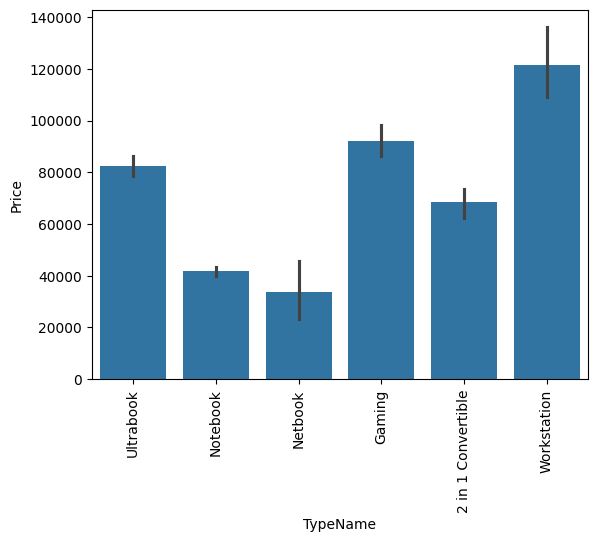

In [25]:
sns.barplot( x = "TypeName" , y = "Price" , data = dataset )
plt.xticks( rotation = "vertical")
plt.show()

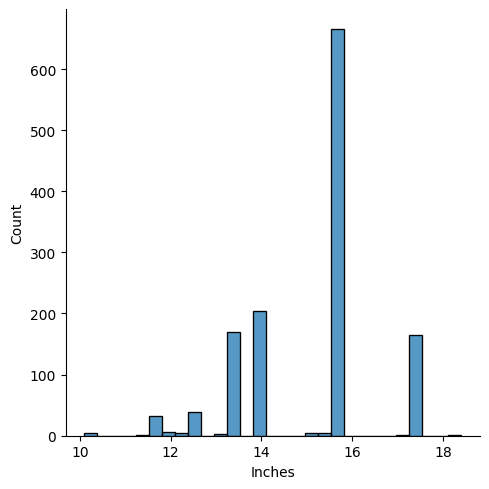

In [26]:
sns.displot(x = "Inches" , data = dataset)
plt.show()

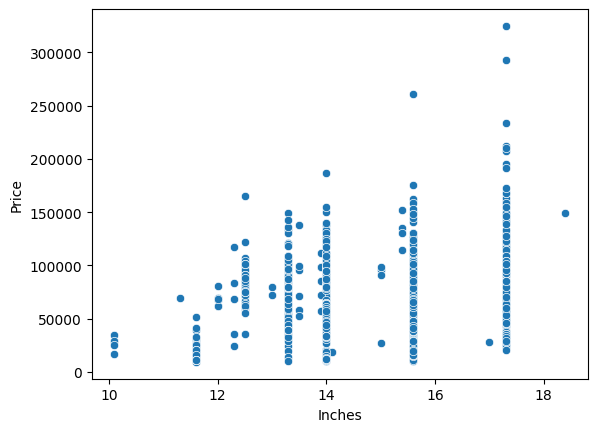

In [27]:
sns.scatterplot( x = "Inches" , y = "Price" , data = dataset)
plt.show()

In [28]:
dataset["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [29]:
dataset["ScreenResolution"].value_counts().sum()

1303

In [30]:
dataset["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" else 0)

0       1
1       1
2       1
3       1
4       1
       ..
1298    1
1299    1
1300    1
1301    1
1302    1
Name: ScreenResolution, Length: 1303, dtype: int64

In [31]:
dataset["Touchscreen"] = dataset["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [32]:
dataset.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
206,Dell,Notebook,15.6,Touchscreen 1366x768,Intel Core i3 7100U 2.4GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,23389.92,1
892,Samsung,Ultrabook,15.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.17,90522.72,0
821,Toshiba,Ultrabook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.25,58075.20,0
534,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.30,87858.72,0
477,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,180GB SSD,Intel HD Graphics 620,Windows 10,1.70,72673.92,0
237,Asus,Notebook,15.6,Full HD 1920x1080,AMD A10-Series A10-9620P 2.5GHz,4,128GB SSD + 1TB HDD,AMD Radeon R5 M430,Windows 10,2.20,30636.00,0
803,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,93186.72,1
727,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.71,34578.72,1
675,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,68944.32,0
292,HP,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,2.54,26053.92,0


In [33]:
dataset["Touchscreen"].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

<Axes: xlabel='Touchscreen'>

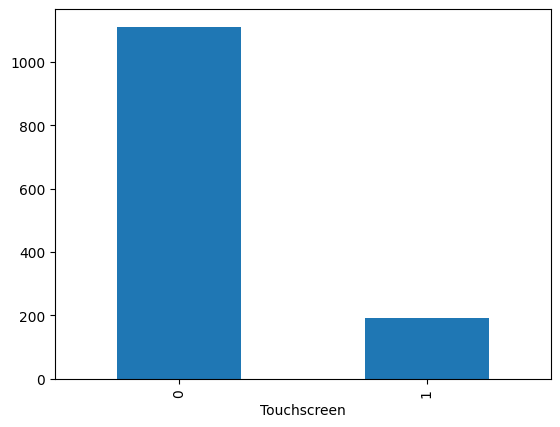

In [34]:
dataset["Touchscreen"].value_counts().plot(kind = "bar")

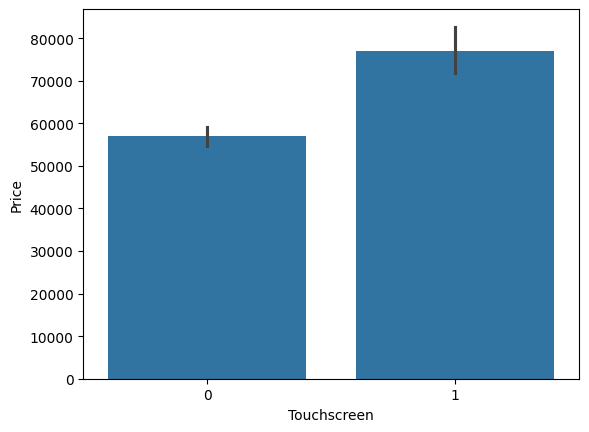

In [35]:
sns.barplot( x = "Touchscreen" , y = "Price" , data = dataset)
plt.show()

In [36]:
dataset["IPS"] = dataset["ScreenResolution"].apply(lambda x: 1 if "IPS" in x else 0)
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [37]:
dataset.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
919,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,59668.8048,0,0
30,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89,13053.0672,0,0
370,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512GB SSD + 2TB HDD,Nvidia GeForce GT 940MX,Windows 10,2.26,58554.7200,1,0
943,Toshiba,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.20,59620.3200,0,0


In [38]:
dataset["IPS"].value_counts()

IPS
0    938
1    365
Name: count, dtype: int64

<Axes: xlabel='IPS'>

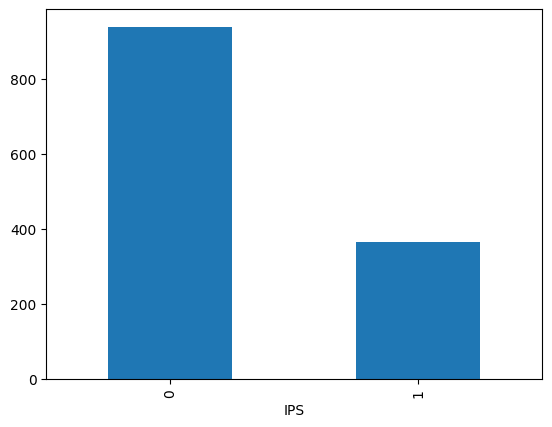

In [39]:
dataset["IPS"].value_counts().plot(kind="bar")

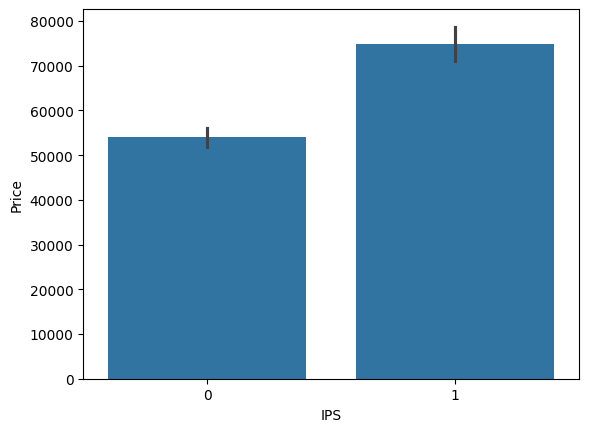

In [40]:
sns.barplot( x = "IPS" , y = "Price" , data = dataset)
plt.show()

In [41]:
dataset["ScreenResolution"].str.split("x")

0               [IPS Panel Retina Display 2560, 1600]
1                                         [1440, 900]
2                                [Full HD 1920, 1080]
3               [IPS Panel Retina Display 2880, 1800]
4               [IPS Panel Retina Display 2560, 1600]
                            ...                      
1298     [IPS Panel Full HD / Touchscreen 1920, 1080]
1299    [IPS Panel Quad HD+ / Touchscreen 3200, 1800]
1300                                      [1366, 768]
1301                                      [1366, 768]
1302                                      [1366, 768]
Name: ScreenResolution, Length: 1303, dtype: object

In [42]:
dataset["ScreenResolution"].str.split("x" , n = 1)

0               [IPS Panel Retina Display 2560, 1600]
1                                         [1440, 900]
2                                [Full HD 1920, 1080]
3               [IPS Panel Retina Display 2880, 1800]
4               [IPS Panel Retina Display 2560, 1600]
                            ...                      
1298     [IPS Panel Full HD / Touchscreen 1920, 1080]
1299    [IPS Panel Quad HD+ / Touchscreen 3200, 1800]
1300                                      [1366, 768]
1301                                      [1366, 768]
1302                                      [1366, 768]
Name: ScreenResolution, Length: 1303, dtype: object

In [43]:
dataset["ScreenResolution"].str.split("x" , expand = True )

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [44]:
dataset["ScreenResolution"].str.split("x" , n = 1 , expand = True )

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [45]:
new = dataset["ScreenResolution"].str.split("x" , n = 1 , expand = True )
dataset["X_resolution"] = new[0]
dataset["Y_resolution"] = new[1]

In [46]:
dataset.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [47]:
dataset["X_resolution"].str.replace ("," , " ").str.findall (r"(\d+\.?\d+)")
#raw string used to find 4 digit numeric patterns

0       [2560]
1       [1440]
2       [1920]
3       [2880]
4       [2560]
         ...  
1298    [1920]
1299    [3200]
1300    [1366]
1301    [1366]
1302    [1366]
Name: X_resolution, Length: 1303, dtype: object

In [48]:
#extract values from the list
dataset["X_resolution"].str.replace ("," , " ").str.findall (r"(\d+\.?\d+)").apply(lambda x : x[0])

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_resolution, Length: 1303, dtype: object

In [49]:
dataset["X_resolution"] = dataset["X_resolution"].str.replace ("," , " ").str.findall (r"(\d+\.?\d+)").apply(lambda x : x[0])

In [50]:
dataset.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_resolution      1303 non-null   object 
 14  Y_resolution      1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [52]:
dataset["X_resolution"] = dataset["X_resolution"].astype("int32") 
dataset["Y_resolution"] = dataset["Y_resolution"].astype("int32") 

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_resolution      1303 non-null   int32  
 14  Y_resolution      1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [54]:
dataset.corr(numeric_only= True)

,Inches,Ram,Weight,Price,Touchscreen,IPS,X_resolution,Y_resolution
Inches,1.000000,0.237993,0.827631,0.068197,-0.361735,-0.114804,-0.071245,-0.095404
Ram,0.237993,1.000000,0.383874,0.743007,0.116984,0.206623,0.433121,0.424437
Weight,0.827631,0.383874,1.000000,0.210370,-0.294620,0.016967,-0.032880,-0.053846
Price,0.068197,0.743007,0.210370,1.000000,0.191226,0.252208,0.556529,0.552809
Touchscreen,-0.361735,0.116984,-0.294620,0.191226,1.000000,0.150512,0.351066,0.357930
IPS,-0.114804,0.206623,0.016967,0.252208,0.150512,1.000000,0.281457,0.289030
X_resolution,-0.071245,0.433121,-0.032880,0.556529,0.351066,0.281457,1.000000,0.994219
Y_resolution,-0.095404,0.424437,-0.053846,0.552809,0.357930,0.289030,0.994219,1.000000


In [55]:
dataset.corr(numeric_only= True)["Price"]

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.252208
X_resolution    0.556529
Y_resolution    0.552809
Name: Price, dtype: float64

In [56]:
# ppi --> pixel per inches 

(  (dataset["X_resolution"])**2  +   (dataset["Y_resolution"])**2  )**0.5 / dataset["Inches"]

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1298    157.350512
1299    276.053530
1300    111.935204
1301    100.454670
1302    100.454670
Length: 1303, dtype: float64

In [57]:
dataset["PPI"] = ((  (dataset["X_resolution"])**2  +   (dataset["Y_resolution"])**2  )**0.5 / dataset["Inches"]).astype("float")

In [58]:
dataset.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_resolution,Y_resolution,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [59]:
dataset.corr(numeric_only= True)["Price"]

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.252208
X_resolution    0.556529
Y_resolution    0.552809
PPI             0.473487
Name: Price, dtype: float64

In [60]:
dataset.drop(columns = ["ScreenResolution","Inches","Y_resolution","X_resolution"] , inplace = True)

In [61]:
dataset.head(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [62]:
dataset["RAM (GB)"] = dataset["Ram"]
dataset.head(4)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,RAM (GB)
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,8
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,8
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,8
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,16


In [63]:
dataset["Weight (kg)"] = dataset["Weight"]
dataset.head(4)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg)
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,8,1.37
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,8,1.34
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,8,1.86
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,16,1.83


In [64]:
dataset.drop(columns = ["Weight"] , inplace = True)
dataset.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg)
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,0,1,226.983005,8,1.37
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,0,0,127.677940,8,1.34
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,0,0,141.211998,8,1.86


In [65]:
dataset["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [66]:
dataset["Cpu"].apply(lambda x: x.split())

0                         [Intel, Core, i5, 2.3GHz]
1                         [Intel, Core, i5, 1.8GHz]
2                  [Intel, Core, i5, 7200U, 2.5GHz]
3                         [Intel, Core, i7, 2.7GHz]
4                         [Intel, Core, i5, 3.1GHz]
                           ...                     
1298               [Intel, Core, i7, 6500U, 2.5GHz]
1299               [Intel, Core, i7, 6500U, 2.5GHz]
1300    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
1301               [Intel, Core, i7, 6500U, 2.5GHz]
1302    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
Name: Cpu, Length: 1303, dtype: object

In [67]:
dataset["Cpu"].apply(lambda x: x.split()[0:3])

0            [Intel, Core, i5]
1            [Intel, Core, i5]
2            [Intel, Core, i5]
3            [Intel, Core, i7]
4            [Intel, Core, i5]
                 ...          
1298         [Intel, Core, i7]
1299         [Intel, Core, i7]
1300    [Intel, Celeron, Dual]
1301         [Intel, Core, i7]
1302    [Intel, Celeron, Dual]
Name: Cpu, Length: 1303, dtype: object

In [68]:
dataset["Cpu name"] = dataset["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))

In [69]:
dataset.head(4)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),Cpu name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,0,1,226.983005,8,1.37,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,0,0,127.677940,8,1.34,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,0,0,141.211998,8,1.86,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,0,1,220.534624,16,1.83,Intel Core i7


In [70]:
def fetch_processor (text):

    if text == "Intel Core i7" or text == "Intel Core i5" or text == "Intel Core i3" :
        return text

    else:
        #see if the first word is intel
        if text.split()[0] == "Intel":
            return "Other Intel Processor"

        else:
            return "AMD Processor"
        

In [71]:
dataset["CPU brand"] = dataset["Cpu name"].apply(fetch_processor)

In [72]:
dataset.head(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),Cpu name,CPU brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,0,1,226.983005,8,1.37,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,0,0,127.677940,8,1.34,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,0,0,141.211998,8,1.86,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,0,1,220.534624,16,1.83,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,0,1,226.983005,8,1.37,Intel Core i5,Intel Core i5


In [73]:
dataset.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),Cpu name,CPU brand
1118,Toshiba,Ultrabook,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,118601.2800,0,0,165.632118,16,1.05,Intel Core i7,Intel Core i7
822,Lenovo,Ultrabook,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,133146.7200,0,1,157.350512,8,1.13,Intel Core i7,Intel Core i7
1209,Asus,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,130482.7200,0,0,141.211998,16,2.20,Intel Core i7,Intel Core i7
492,Asus,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,71928.0000,0,0,141.211998,8,1.99,Intel Core i7,Intel Core i7
604,Dell,Notebook,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M420,Linux,24775.2000,0,0,100.454670,4,2.18,Intel Core i3,Intel Core i3
440,Lenovo,Notebook,AMD A6-Series 9220 2.5GHz,8,1TB HDD,AMD Radeon R4,Windows 10,27652.3200,0,0,106.113062,8,2.80,AMD A6-Series 9220,AMD Processor
1070,Dell,Notebook,Intel Core i3 6100U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,25679.8944,0,0,100.454670,4,2.06,Intel Core i3,Intel Core i3
14,Apple,Ultrabook,Intel Core M m3 1.2GHz,8,256GB SSD,Intel HD Graphics 615,macOS,67260.6720,0,1,226.415547,8,0.92,Intel Core M,Other Intel Processor
348,Asus,2 in 1 Convertible,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,19980.0000,1,0,135.094211,4,1.50,Intel Celeron Dual,Other Intel Processor
739,Acer,Notebook,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,21887.4240,0,0,100.454670,4,2.40,Intel Core i3,Intel Core i3


In [74]:
dataset["CPU brand"].value_counts()

CPU brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64

<Axes: xlabel='CPU brand'>

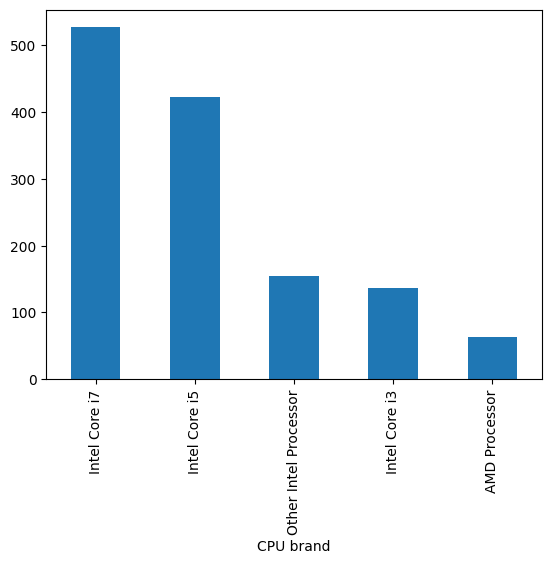

In [75]:
dataset["CPU brand"].value_counts().plot(kind = "bar")

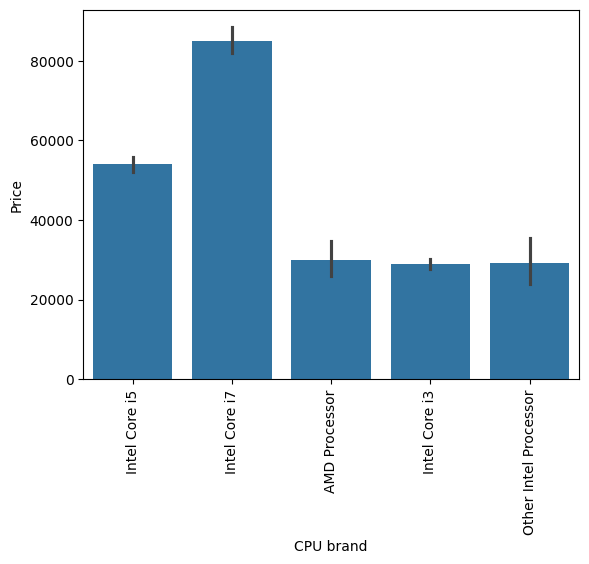

In [76]:
sns.barplot( x = "CPU brand" , y = "Price"  , data = dataset )
plt.xticks(rotation = "vertical")
plt.show()

In [77]:
dataset.drop(columns = ["Cpu name","Cpu"] , inplace = True)

In [78]:
dataset.head(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),CPU brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,0,1,226.983005,8,1.37,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,0,0,127.677940,8,1.34,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,0,0,141.211998,8,1.86,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,0,1,220.534624,16,1.83,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,0,1,226.983005,8,1.37,Intel Core i5


In [79]:
dataset["RAM (GB)"].value_counts()

RAM (GB)
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

<Axes: xlabel='RAM (GB)'>

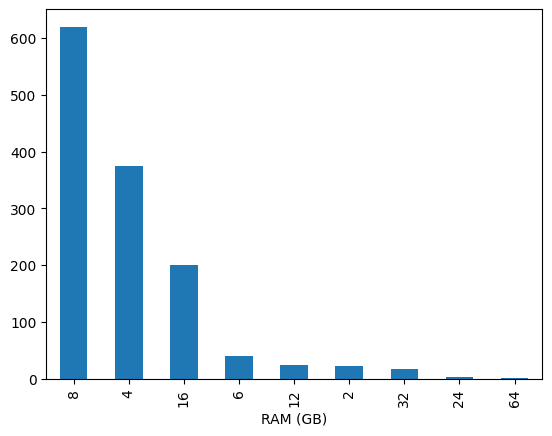

In [80]:
dataset["RAM (GB)"].value_counts().plot(kind = "bar")

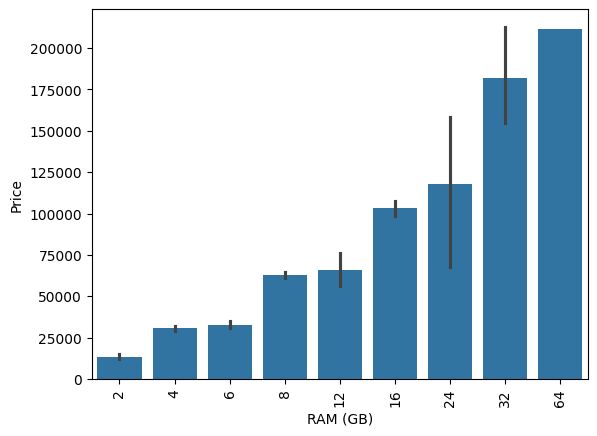

In [81]:
sns.barplot( x = "RAM (GB)" , y = "Price"  , data = dataset )
plt.xticks(rotation = "vertical")
plt.show()

In [82]:
dataset["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

<Axes: xlabel='Memory'>

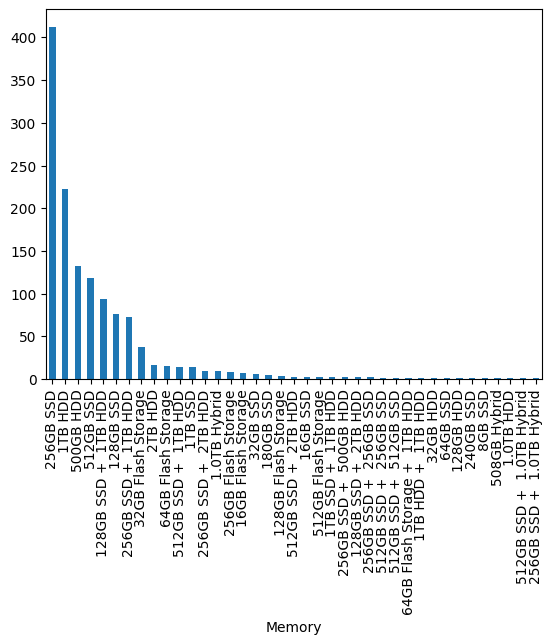

In [83]:
dataset["Memory"].value_counts().plot(kind = "bar")

In [84]:
dataset["Memory"] = dataset["Memory"].astype(str).replace('\.0', '', regex= True)
dataset["Memory"] = dataset["Memory"].str.replace('GB', '')
dataset["Memory"] = dataset["Memory"].str.replace('TB', '000')
new = dataset["Memory"].str.split("+", n = 1, expand = True)

dataset["first"]= new[0]
dataset["first"]=dataset["first"].str.strip()
dataset["second"]= new[1]


dataset["Layer1HDD"] = dataset["first"].apply(lambda x: 1 if "HDD" in x else 0)
dataset["Layer1SSD"] = dataset["first"].apply(lambda x: 1 if "SSD" in x else 0)
dataset["Layer1Hybrid"] = dataset["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
dataset["Layer1Flash_Storage"] = dataset["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

dataset['first'] = dataset['first'].str.replace(r'\D', '' , regex = True)
dataset["second"].fillna("0", inplace = True)


dataset["Layer2HDD"] = dataset["second"].apply(lambda x: 1 if "HDD" in x else 0)
dataset["Layer2SSD"] = dataset["second"].apply(lambda x: 1 if "SSD" in x else 0)
dataset["Layer2Hybrid"] = dataset["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
dataset["Layer2Flash_Storage"] = dataset["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)


dataset['second'] = dataset['second'].str.replace(r'\D', '' , regex = True)
dataset["first"] = dataset["first"].astype(int)
dataset["second"] = dataset["second"].astype(int)


dataset["HDD"]=(dataset["first"]*dataset["Layer1HDD"]+dataset["second"]*dataset["Layer2HDD"])
dataset["SSD"]=(dataset["first"]*dataset["Layer1SSD"]+dataset["second"]*dataset["Layer2SSD"])
dataset["Hybrid"]=(dataset["first"]*dataset["Layer1Hybrid"]+dataset["second"]*dataset["Layer2Hybrid"])
dataset["Flash_Storage"]=(dataset["first"]*dataset["Layer1Flash_Storage"]+dataset["second"]*dataset["Layer2Flash_Storage"])


dataset.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\shabi\AppData\Local\Temp\ipykernel_14092\4014117113.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["second"].fillna("0", inplace = True)


In [85]:
dataset.head(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),CPU brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,0,1,226.983005,8,1.37,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,0,0,127.677940,8,1.34,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,30636.0000,0,0,141.211998,8,1.86,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,135195.3360,0,1,220.534624,16,1.83,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,0,1,226.983005,8,1.37,Intel Core i5,0,256,0,0


In [86]:
dataset.drop( columns = "Memory" , inplace = True) 

In [87]:
dataset.head(4)

,Company,TypeName,Ram,Gpu,OpSys,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),CPU brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,71378.6832,0,1,226.983005,8,1.37,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,47895.5232,0,0,127.677940,8,1.34,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,30636.0000,0,0,141.211998,8,1.86,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,135195.3360,0,1,220.534624,16,1.83,Intel Core i7,0,512,0,0


In [88]:
dataset.corr(numeric_only= True)["Price"]

Ram              0.743007
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
RAM (GB)         0.743007
Weight (kg)      0.210370
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [89]:
#lets drop hybrid & flash storage

dataset.drop(columns= ["Hybrid","Flash_Storage"] , inplace= True)

In [90]:
dataset.head()

,Company,TypeName,Ram,Gpu,OpSys,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),CPU brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,71378.6832,0,1,226.983005,8,1.37,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,47895.5232,0,0,127.677940,8,1.34,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,30636.0000,0,0,141.211998,8,1.86,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,135195.3360,0,1,220.534624,16,1.83,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,96095.8080,0,1,226.983005,8,1.37,Intel Core i5,0,256


In [91]:
dataset.drop(columns= "Ram" , inplace= True)

In [92]:
dataset.head()

,Company,TypeName,Gpu,OpSys,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),CPU brand,HDD,SSD
0,Apple,Ultrabook,Intel Iris Plus Graphics 640,macOS,71378.6832,0,1,226.983005,8,1.37,Intel Core i5,0,128
1,Apple,Ultrabook,Intel HD Graphics 6000,macOS,47895.5232,0,0,127.677940,8,1.34,Intel Core i5,0,0
2,HP,Notebook,Intel HD Graphics 620,No OS,30636.0000,0,0,141.211998,8,1.86,Intel Core i5,0,256
3,Apple,Ultrabook,AMD Radeon Pro 455,macOS,135195.3360,0,1,220.534624,16,1.83,Intel Core i7,0,512
4,Apple,Ultrabook,Intel Iris Plus Graphics 650,macOS,96095.8080,0,1,226.983005,8,1.37,Intel Core i5,0,256


In [93]:
dataset["Gpu"].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [94]:
#so now we have only option to retrive the brand name and drop other

In [95]:
dataset["Gpu"].apply(lambda x: x .split()[0])

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu, Length: 1303, dtype: object

In [96]:
dataset["Gpu Brand"] = dataset["Gpu"].apply(lambda x: x .split()[0])

In [97]:
dataset.head(4)

,Company,TypeName,Gpu,OpSys,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),CPU brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,Intel Iris Plus Graphics 640,macOS,71378.6832,0,1,226.983005,8,1.37,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,Intel HD Graphics 6000,macOS,47895.5232,0,0,127.677940,8,1.34,Intel Core i5,0,0,Intel
2,HP,Notebook,Intel HD Graphics 620,No OS,30636.0000,0,0,141.211998,8,1.86,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,AMD Radeon Pro 455,macOS,135195.3360,0,1,220.534624,16,1.83,Intel Core i7,0,512,AMD


In [98]:
dataset["Gpu Brand"].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

<Axes: xlabel='Gpu Brand'>

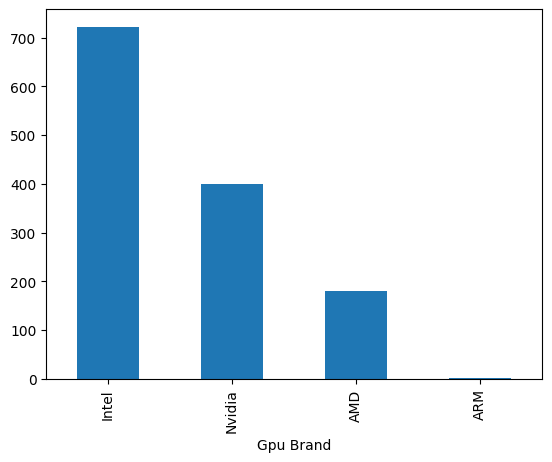

In [99]:
dataset["Gpu Brand"].value_counts().plot(kind = "bar")

In [100]:
dataset[dataset["Gpu Brand"] == "ARM"]

,Company,TypeName,Gpu,OpSys,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),CPU brand,HDD,SSD,Gpu Brand
1191,Samsung,2 in 1 Convertible,ARM Mali T860 MP4,Chrome OS,35111.52,1,1,234.5074,4,1.15,AMD Processor,0,0,ARM


In [101]:
dataset = dataset[dataset["Gpu Brand"] != "ARM"]

In [102]:
dataset["Gpu Brand"].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

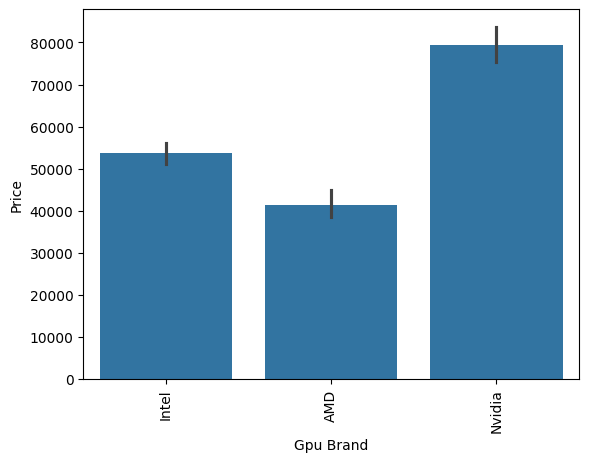

In [103]:
sns.barplot( x = "Gpu Brand" , y = "Price"  , data = dataset )
plt.xticks(rotation = "vertical")
plt.show()

In [104]:
dataset.head(4)

,Company,TypeName,Gpu,OpSys,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),CPU brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,Intel Iris Plus Graphics 640,macOS,71378.6832,0,1,226.983005,8,1.37,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,Intel HD Graphics 6000,macOS,47895.5232,0,0,127.677940,8,1.34,Intel Core i5,0,0,Intel
2,HP,Notebook,Intel HD Graphics 620,No OS,30636.0000,0,0,141.211998,8,1.86,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,AMD Radeon Pro 455,macOS,135195.3360,0,1,220.534624,16,1.83,Intel Core i7,0,512,AMD


In [105]:
#dataset.drop(columns= ["Gpu"] , inplace = True)

In [106]:
dataset.head(3)

,Company,TypeName,Gpu,OpSys,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),CPU brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,Intel Iris Plus Graphics 640,macOS,71378.6832,0,1,226.983005,8,1.37,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,Intel HD Graphics 6000,macOS,47895.5232,0,0,127.677940,8,1.34,Intel Core i5,0,0,Intel
2,HP,Notebook,Intel HD Graphics 620,No OS,30636.0000,0,0,141.211998,8,1.86,Intel Core i5,0,256,Intel


In [107]:
dataset["OpSys"].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

<Axes: xlabel='OpSys'>

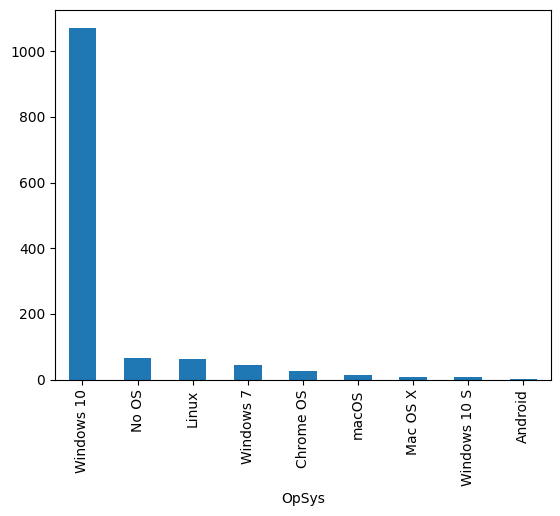

In [108]:
dataset["OpSys"].value_counts().plot(kind = "bar")

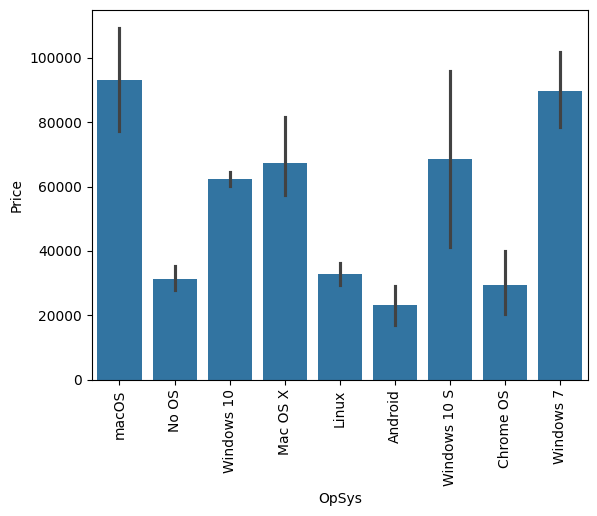

In [109]:
sns.barplot( x = "OpSys" , y = "Price" , data = dataset)
plt.xticks(rotation = "vertical")
plt.show()

In [110]:
def fetch_os( x ):

    if x == "Windows 10" or x == "Windows 7" or x == "Windows 10 S" :
        return "Windows"

    elif x == "macOS" or x == "Mac OS X" :
        return "Mac"

    else:
        return "Others / No OS / Linux"
    


In [111]:
dataset["OS"] = dataset["OpSys"].apply (fetch_os)

C:\Users\shabi\AppData\Local\Temp\ipykernel_14092\2159293495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["OS"] = dataset["OpSys"].apply (fetch_os)


In [112]:
dataset.head(5)

,Company,TypeName,Gpu,OpSys,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),CPU brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,Intel Iris Plus Graphics 640,macOS,71378.6832,0,1,226.983005,8,1.37,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,Intel HD Graphics 6000,macOS,47895.5232,0,0,127.677940,8,1.34,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,Intel HD Graphics 620,No OS,30636.0000,0,0,141.211998,8,1.86,Intel Core i5,0,256,Intel,Others / No OS / Linux
3,Apple,Ultrabook,AMD Radeon Pro 455,macOS,135195.3360,0,1,220.534624,16,1.83,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,Intel Iris Plus Graphics 650,macOS,96095.8080,0,1,226.983005,8,1.37,Intel Core i5,0,256,Intel,Mac


In [113]:
dataset.sample(10)

,Company,TypeName,Gpu,OpSys,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),CPU brand,HDD,SSD,Gpu Brand,OS
781,Asus,Gaming,Nvidia GeForce GTX 1070,Windows 10,125208.0000,0,1,127.335675,16,4.30,Intel Core i7,1000,256,Nvidia,Windows
1279,Lenovo,Notebook,Nvidia GeForce GTX 960M,Windows 10,47898.7200,0,1,141.211998,8,2.60,Intel Core i7,1000,0,Nvidia,Windows
309,HP,Notebook,Intel HD Graphics 520,Windows 10,24988.3200,0,0,141.211998,4,1.86,Intel Core i3,1000,0,Intel,Windows
674,HP,2 in 1 Convertible,Nvidia GeForce 940MX,Windows 10,37242.7200,1,1,157.350512,4,1.63,Intel Core i3,0,128,Nvidia,Windows
201,Lenovo,Notebook,Intel HD Graphics 520,Windows 10,26267.0400,0,0,100.454670,4,2.10,Intel Core i5,0,128,Intel,Windows
1098,HP,Notebook,Intel HD Graphics 405,Windows 10,26640.0000,0,0,100.454670,4,1.96,Other Intel Processor,1000,0,Intel,Windows
356,Lenovo,Notebook,Intel HD Graphics 500,No OS,17155.6272,0,0,100.454670,4,2.20,Other Intel Processor,1000,0,Intel,Others / No OS / Linux
35,Lenovo,Notebook,Intel HD Graphics 500,Windows 10,13266.7200,0,0,111.935204,4,1.44,Other Intel Processor,0,0,Intel,Windows
1032,MSI,Gaming,Nvidia GeForce GTX 1050,Windows 10,63499.1040,0,0,127.335675,8,2.70,Intel Core i7,1000,128,Nvidia,Windows
1287,HP,Notebook,AMD Radeon R5 M330,Windows 10,40705.9200,0,0,100.454670,6,2.19,Intel Core i7,1000,0,AMD,Windows


In [114]:
dataset.drop( columns= ["OpSys"] , inplace = True)

C:\Users\shabi\AppData\Local\Temp\ipykernel_14092\1471125463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop( columns= ["OpSys"] , inplace = True)


In [115]:
dataset.head(5)

,Company,TypeName,Gpu,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),CPU brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,Intel Iris Plus Graphics 640,71378.6832,0,1,226.983005,8,1.37,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,Intel HD Graphics 6000,47895.5232,0,0,127.677940,8,1.34,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,Intel HD Graphics 620,30636.0000,0,0,141.211998,8,1.86,Intel Core i5,0,256,Intel,Others / No OS / Linux
3,Apple,Ultrabook,AMD Radeon Pro 455,135195.3360,0,1,220.534624,16,1.83,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,Intel Iris Plus Graphics 650,96095.8080,0,1,226.983005,8,1.37,Intel Core i5,0,256,Intel,Mac


In [116]:
dataset["OS"].value_counts()

OS
Windows                   1125
Others / No OS / Linux     156
Mac                         21
Name: count, dtype: int64

<Axes: xlabel='OS'>

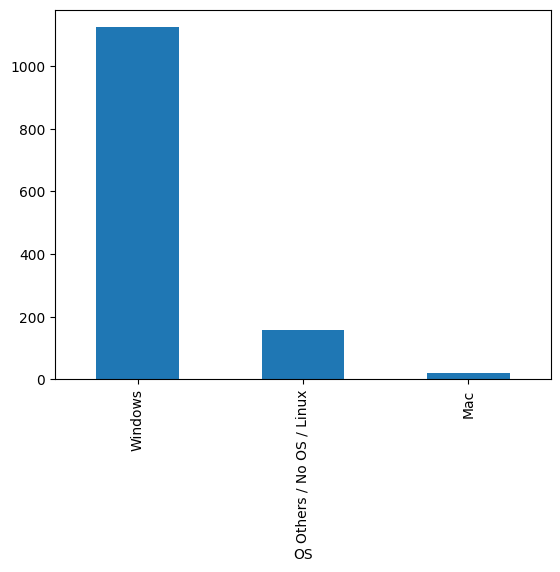

In [117]:
dataset["OS"].value_counts().plot(kind = "bar")

In [118]:
dataset

,Company,TypeName,Gpu,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),CPU brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,Intel Iris Plus Graphics 640,71378.6832,0,1,226.983005,8,1.37,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,Intel HD Graphics 6000,47895.5232,0,0,127.677940,8,1.34,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,Intel HD Graphics 620,30636.0000,0,0,141.211998,8,1.86,Intel Core i5,0,256,Intel,Others / No OS / Linux
3,Apple,Ultrabook,AMD Radeon Pro 455,135195.3360,0,1,220.534624,16,1.83,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,Intel Iris Plus Graphics 650,96095.8080,0,1,226.983005,8,1.37,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel HD Graphics 520,33992.6400,1,1,157.350512,4,1.80,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,Intel HD Graphics 520,79866.7200,1,1,276.053530,16,1.30,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,Intel HD Graphics,12201.1200,0,0,111.935204,2,1.50,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,AMD Radeon R5 M330,40705.9200,0,0,100.454670,6,2.19,Intel Core i7,1000,0,AMD,Windows


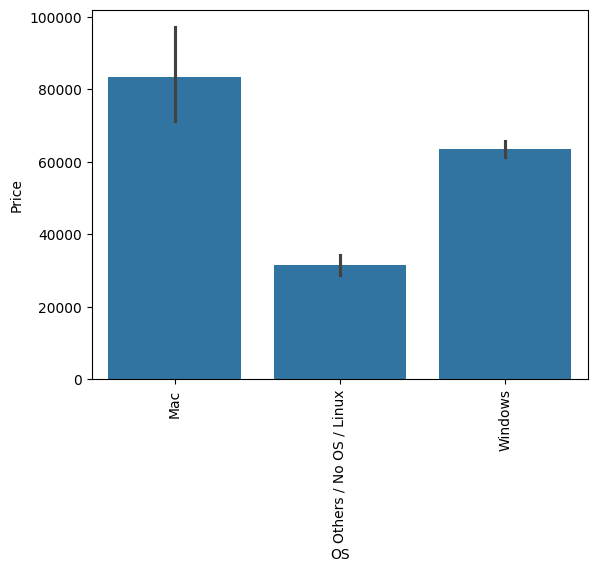

In [119]:
sns.barplot( x = "OS" , y = "Price" , data = dataset)
plt.xticks(rotation = "vertical")
plt.show()

C:\Users\shabi\AppData\Local\Temp\ipykernel_14092\1553316322.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Weight (kg)"])


<Axes: xlabel='Weight (kg)', ylabel='Density'>

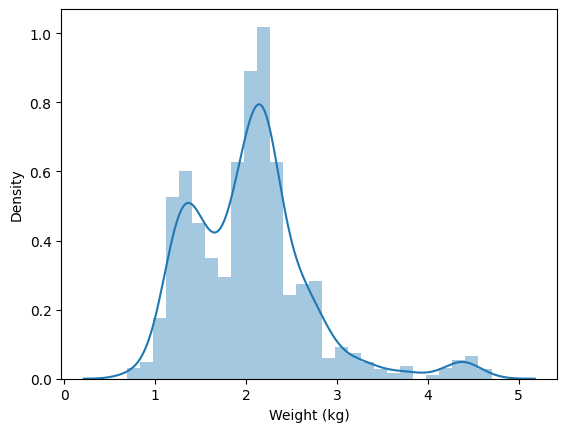

In [120]:
sns.distplot(dataset["Weight (kg)"])

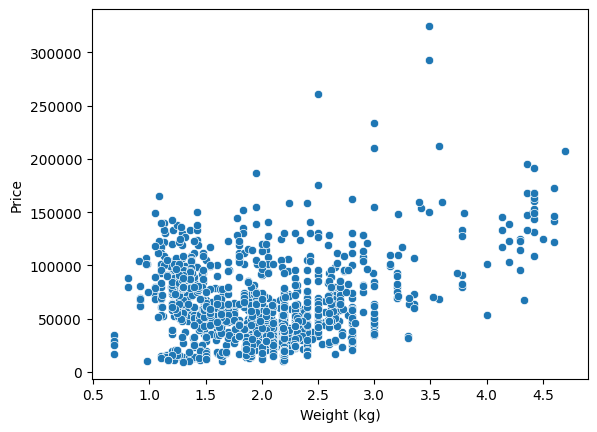

In [121]:
sns.scatterplot( x = "Weight (kg)" , y = "Price" , data = dataset )
plt.show()

In [122]:
dataset.corr(numeric_only = True )["Price"]

Price          1.000000
Touchscreen    0.192917
IPS            0.253320
PPI            0.475368
RAM (GB)       0.742905
Weight (kg)    0.209867
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

In [123]:
dataset.corr(numeric_only = True )

,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),HDD,SSD
Price,1.000000,0.192917,0.253320,0.475368,0.742905,0.209867,-0.096891,0.670660
Touchscreen,0.192917,1.000000,0.148026,0.458571,0.118875,-0.293004,-0.208766,0.257577
IPS,0.253320,0.148026,1.000000,0.299142,0.207949,0.018643,-0.093588,0.225311
PPI,0.475368,0.458571,0.299142,1.000000,0.305688,-0.321883,-0.294698,0.509437
RAM (GB),0.742905,0.118875,0.207949,0.305688,1.000000,0.383362,0.095808,0.603379
Weight (kg),0.209867,-0.293004,0.018643,-0.321883,0.383362,1.000000,0.514147,-0.063818
HDD,-0.096891,-0.208766,-0.093588,-0.294698,0.095808,0.514147,1.000000,-0.400750
SSD,0.670660,0.257577,0.225311,0.509437,0.603379,-0.063818,-0.400750,1.000000


<Axes: >

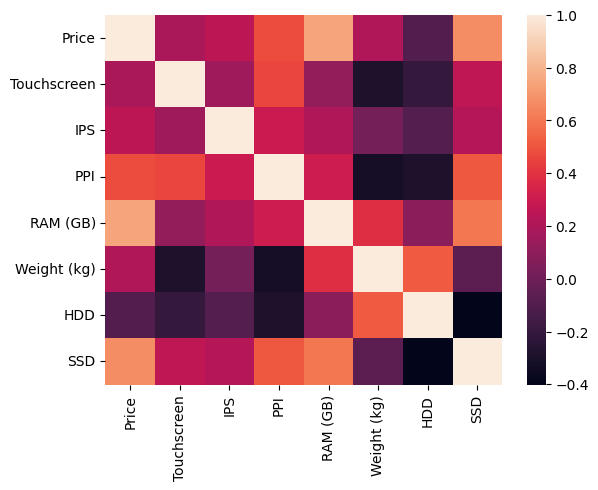

In [124]:
sns.heatmap(dataset.corr(numeric_only = True ))

In [125]:
#our target column is skewed...so lets apply log transformation on it , if not then it will trouble our ml algorithms

C:\Users\shabi\AppData\Local\Temp\ipykernel_14092\3902254670.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Price"])


<Axes: xlabel='Price', ylabel='Density'>

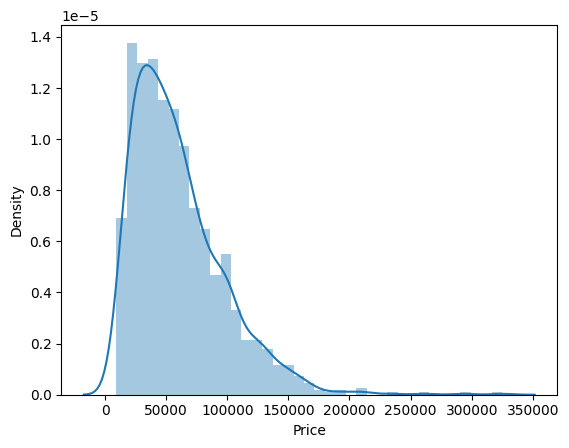

In [126]:
sns.distplot(dataset["Price"])

C:\Users\shabi\AppData\Local\Temp\ipykernel_14092\3236737092.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(dataset["Price"]))


<Axes: xlabel='Price', ylabel='Density'>

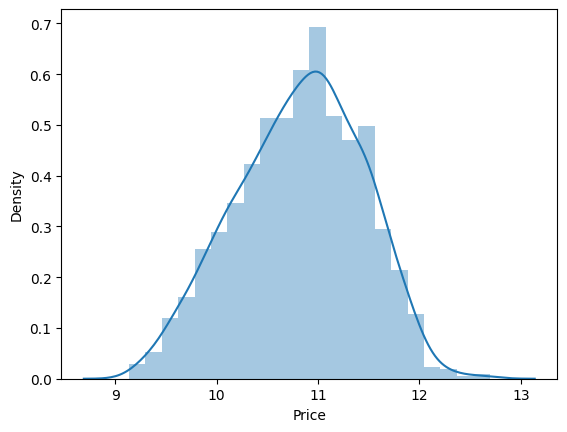

In [127]:
sns.distplot(np.log(dataset["Price"]))

In [148]:
x = dataset.drop( columns= ["Price"])
y = np.log (dataset["Price"])

In [149]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [150]:
x

,Company,TypeName,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),CPU brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,0,1,226.983005,8,1.37,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,0,0,127.677940,8,1.34,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,0,0,141.211998,8,1.86,Intel Core i5,0,256,Intel,Others / No OS / Linux
3,Apple,Ultrabook,0,1,220.534624,16,1.83,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,0,1,226.983005,8,1.37,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,1,1,157.350512,4,1.80,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,1,1,276.053530,16,1.30,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,0,0,111.935204,2,1.50,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,0,0,100.454670,6,2.19,Intel Core i7,1000,0,AMD,Windows


C:\Users\shabi\AppData\Local\Temp\ipykernel_14092\1685660910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns= ["Gpu"] , inplace=True)


In [151]:
from sklearn.model_selection import train_test_split


In [152]:
x_train , x_test , y_train , y_test = train_test_split ( x , y , test_size = 0.15 , random_state = 2)

In [153]:
x_train

,Company,TypeName,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),CPU brand,HDD,SSD,Gpu Brand,OS
183,Toshiba,Notebook,0,0,100.454670,8,2.00,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,0,0,141.211998,8,2.40,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,0,0,135.094211,4,1.20,Other Intel Processor,0,0,Intel,Others / No OS / Linux
1020,Dell,2 in 1 Convertible,1,1,141.211998,4,2.08,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,0,0,141.211998,4,2.18,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,0,0,100.454670,4,2.20,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,0,0,141.211998,16,1.63,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,0,0,100.454670,8,2.20,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,0,0,100.454670,8,2.20,Intel Core i3,2000,0,Nvidia,Others / No OS / Linux


In [154]:
dataset.head(10)

,Company,TypeName,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),CPU brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,71378.6832,0,1,226.983005,8,1.37,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,47895.5232,0,0,127.677940,8,1.34,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,30636.0000,0,0,141.211998,8,1.86,Intel Core i5,0,256,Intel,Others / No OS / Linux
3,Apple,Ultrabook,135195.3360,0,1,220.534624,16,1.83,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,96095.8080,0,1,226.983005,8,1.37,Intel Core i5,0,256,Intel,Mac
5,Acer,Notebook,21312.0000,0,0,100.454670,4,2.10,AMD Processor,500,0,AMD,Windows
6,Apple,Ultrabook,114017.6016,0,1,220.534624,16,2.04,Intel Core i7,0,0,Intel,Mac
7,Apple,Ultrabook,61735.5360,0,0,127.677940,8,1.34,Intel Core i5,0,0,Intel,Mac
8,Asus,Ultrabook,79653.6000,0,0,157.350512,16,1.30,Intel Core i7,0,512,Nvidia,Windows
9,Acer,Ultrabook,41025.6000,0,1,157.350512,8,1.60,Intel Core i5,0,256,Intel,Windows


In [155]:
dataset["CPU brand"].value_counts()

CPU brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             62
Name: count, dtype: int64

In [156]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [157]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
#from xgboost import XGBRegressor

In [158]:
dataset.head(1)

,Company,TypeName,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),CPU brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,71378.6832,0,1,226.983005,8,1.37,Intel Core i5,0,128,Intel,Mac


In [159]:
#apply one hot encoding 
'''
Company0	TypeName1	Price	Touchscreen2	IPS3	PPI4	RAM (GB)5	Weight (kg)6	CPU brand7	HDD8	SSD9

Gpu Brand10	OS11

'''


'\nCompany0\tTypeName1\tPrice\tTouchscreen2\tIPS3\tPPI4\tRAM (GB)5\tWeight (kg)6\tCPU brand7\tHDD8\tSSD9\n\nGpu Brand10\tOS11\n\n'

Linear Regression

In [160]:
step1 = ColumnTransformer ( transformers= [("Col trans" , OneHotEncoder ( sparse_output= False , drop = "first"),
                                          [0,1,7,10,11])] , remainder= "passthrough"
                          )


step2 = LinearRegression()

pipe = Pipeline ([
    ("step1" , step1),
    ("step2" , step2)
])


pipe.fit (x_train , y_train)

y_predict = pipe.predict (x_test)

print ("R2_SCORE" , r2_score (y_test , y_predict))
print ("MAE" , mean_absolute_error (y_test , y_predict))

R2_SCORE 0.8073277448418663
MAE 0.21017827976428777


RIDGE REGRESSION

In [161]:
step1 = ColumnTransformer ( transformers= [("Col trans" , OneHotEncoder ( sparse_output= False , drop = "first"),
                                          [0,1,7,10,11])] , remainder= "passthrough"
                          )


step2 = Ridge (alpha = 10)

pipe = Pipeline ([
    ("step1" , step1),
    ("step2" , step2)
])


pipe.fit (x_train , y_train)

y_predict = pipe.predict (x_test)

print ("R2_SCORE" , r2_score (y_test , y_predict))
print ("MAE" , mean_absolute_error (y_test , y_predict))

R2_SCORE 0.8127331031311809
MAE 0.20926802242582976


LASSO REGRESSION

In [162]:
step1 = ColumnTransformer ( transformers= [("Col trans" , OneHotEncoder ( sparse_output= False , drop = "first"),
                                          [0,1,7,10,11])] , remainder= "passthrough"
                          )


step2 = Lasso(alpha= 0.001)

pipe = Pipeline ([
    ("step1" , step1),
    ("step2" , step2)
])


pipe.fit (x_train , y_train)

y_predict = pipe.predict (x_test)

print ("R2_SCORE" , r2_score (y_test , y_predict))
print ("MAE" , mean_absolute_error (y_test , y_predict))

R2_SCORE 0.8071856764425158
MAE 0.21114354833784366


KNN

In [163]:
step1 = ColumnTransformer ( transformers= [("Col trans" , OneHotEncoder ( sparse_output= False , drop = "first"),
                                          [0,1,7,10,11])] , remainder= "passthrough"
                          )


step2 = KNeighborsRegressor (n_neighbors=3)

pipe = Pipeline ([
    ("step1" , step1),
    ("step2" , step2)
])


pipe.fit (x_train , y_train)

y_predict = pipe.predict (x_test)

print ("R2_SCORE" , r2_score (y_test , y_predict))
print ("MAE" , mean_absolute_error (y_test , y_predict))

R2_SCORE 0.8027675291937718
MAE 0.193456293739003


DECISION TREE

In [164]:
step1 = ColumnTransformer ( transformers= [("Col trans" , OneHotEncoder ( sparse_output= False , drop = "first"),
                                          [0,1,7,10,11])] , remainder= "passthrough"
                          )


step2 = DecisionTreeRegressor (max_depth= 8)

pipe = Pipeline ([
    ("step1" , step1),
    ("step2" , step2)
])


pipe.fit (x_train , y_train)

y_predict = pipe.predict (x_test)

print ("R2_SCORE" , r2_score (y_test , y_predict))
print ("MAE" , mean_absolute_error (y_test , y_predict))

R2_SCORE 0.8381027040703561
MAE 0.18383015973233738


SVM

In [165]:
step1 = ColumnTransformer ( transformers= [("Col trans" , OneHotEncoder ( sparse_output= False , drop = "first"),
                                          [0,1,7,10,11])] , remainder= "passthrough"
                          )


step2 = SVR (kernel= "rbf" , C = 10000 , epsilon = 0.1)

pipe = Pipeline ([
    ("step1" , step1),
    ("step2" , step2)
])


pipe.fit (x_train , y_train)

y_predict = pipe.predict (x_test)

print ("R2_SCORE" , r2_score (y_test , y_predict))
print ("MAE" , mean_absolute_error (y_test , y_predict))

R2_SCORE 0.8083180902283282
MAE 0.2023905942725167


RANDOM FOREST

In [166]:
step1 = ColumnTransformer ( transformers= [("Col trans" , OneHotEncoder ( sparse_output= False , drop = "first"),
                                          [0,1,7,10,11])] , remainder= "passthrough"
                          )


step2 = RandomForestRegressor (n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline ([
    ("step1" , step1),
    ("step2" , step2)
])


pipe.fit (x_train , y_train)

y_predict = pipe.predict (x_test)

print ("R2_SCORE" , r2_score (y_test , y_predict))
print ("MAE" , mean_absolute_error (y_test , y_predict))

R2_SCORE 0.8858183563128297
MAE 0.15995892049027163


EXTRA TREES

In [167]:
step1 = ColumnTransformer ( transformers= [("Col trans" , OneHotEncoder ( sparse_output= False , drop = "first"),
                                          [0,1,7,10,11])] , remainder= "passthrough"
                          )


step2 = ExtraTreesRegressor (n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                             bootstrap=True)

pipe = Pipeline ([
    ("step1" , step1),
    ("step2" , step2)
])


pipe.fit (x_train , y_train)

y_predict = pipe.predict (x_test)

print ("R2_SCORE" , r2_score (y_test , y_predict))
print ("MAE" , mean_absolute_error (y_test , y_predict))

R2_SCORE 0.8878688305358959
MAE 0.15942356778469693


ADABOOST

In [168]:
step1 = ColumnTransformer ( transformers= [("Col trans" , OneHotEncoder ( sparse_output= False , drop = "first"),
                                          [0,1,7,10,11])] , remainder= "passthrough"
                          )


step2 = AdaBoostRegressor (n_estimators=100,
                              learning_rate= 1.0)

pipe = Pipeline ([
    ("step1" , step1),
    ("step2" , step2)
])


pipe.fit (x_train , y_train)

y_predict = pipe.predict (x_test)

print ("R2_SCORE" , r2_score (y_test , y_predict))
print ("MAE" , mean_absolute_error (y_test , y_predict))

R2_SCORE 0.8079311679380025
MAE 0.21781219289357834


GRADIENT BOOST

In [169]:
step1 = ColumnTransformer ( transformers= [("Col trans" , OneHotEncoder ( sparse_output= False , drop = "first"),
                                          [0,1,7,10,11])] , remainder= "passthrough"
                          )


step2 = GradientBoostingRegressor (n_estimators=500)
                              

pipe = Pipeline ([
    ("step1" , step1),
    ("step2" , step2)
])


pipe.fit (x_train , y_train)

y_predict = pipe.predict (x_test)

print ("R2_SCORE" , r2_score (y_test , y_predict))
print ("MAE" , mean_absolute_error (y_test , y_predict))

R2_SCORE 0.8832379284097848
MAE 0.15940127645271618


XGBOOST

In [170]:
'''
step1 = ColumnTransformer ( transformers= [("Col trans" , OneHotEncoder ( sparse_output= False , drop = "first"),
                                          [0,1,7,10,11])] , remainder= "passthrough"
                          )


step2 = XGBRegressor (n_estimators=100,
                     learning_rate = 0.5,
                    max_depth=15)

pipe = Pipeline ([
    ("step1" , step1),
    ("step2" , step2)
])


pipe.fit (x_train , y_train)

y_predict = pipe.predict (x_test)

print ("R2_SCORE" , r2_score (y_test , y_predict))
print ("MAE" , mean_absolute_error (y_test , y_predict))
'''

'\nstep1 = ColumnTransformer ( transformers= [("Col trans" , OneHotEncoder ( sparse_output= False , drop = "first"),\n                                          [0,1,7,10,11])] , remainder= "passthrough"\n                          )\n\n\nstep2 = XGBRegressor (n_estimators=100,\n                     learning_rate = 0.5,\n                    max_depth=15)\n\npipe = Pipeline ([\n    ("step1" , step1),\n    ("step2" , step2)\n])\n\n\npipe.fit (x_train , y_train)\n\ny_predict = pipe.predict (x_test)\n\nprint ("R2_SCORE" , r2_score (y_test , y_predict))\nprint ("MAE" , mean_absolute_error (y_test , y_predict))\n'

In [171]:
#now lets combine the best performing models

VOTING REGRESSOR

In [172]:
from sklearn.ensemble import VotingRegressor , StackingRegressor

step1 = ColumnTransformer ( transformers= [("Col trans" , OneHotEncoder ( sparse_output= False , drop = "first"),
                                          [0,1,7,10,11])] , remainder= "passthrough"
                          )

rf = RandomForestRegressor (n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

gdbt = GradientBoostingRegressor (n_estimators=500,
                                max_features = 0.5)

'''xgb = XGBRegressor (n_estimators=25,
                     learning_rate = 0.3,
                    max_depth=5)'''


et =  ExtraTreesRegressor (n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                             bootstrap=True)


step2 = VotingRegressor ([ ("rf" , rf ), ("gdbt" , gdbt) , ("et" , et)] , weights = [5,1,1])


pipe = Pipeline ([
    ("step1" , step1),
    ("step2" , step2)
])


pipe.fit (x_train , y_train)

y_predict = pipe.predict (x_test)

print ("R2_SCORE" , r2_score (y_test , y_predict))
print ("MAE" , mean_absolute_error (y_test , y_predict))

R2_SCORE 0.8905554565238344
MAE 0.15584139159381755


STACKING REGRESSOR

In [173]:
from sklearn.ensemble import VotingRegressor , StackingRegressor

step1 = ColumnTransformer ( transformers= [("Col trans" , OneHotEncoder ( sparse_output= False , drop = "first"),
                                          [0,1,7,10,11])] , remainder= "passthrough"
                          )

estimators = [("rf" , RandomForestRegressor (n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)),

               
              
              ("gdbt" , GradientBoostingRegressor (n_estimators=500,
                                max_features = 0.5)),

              
            

              ("et" , ExtraTreesRegressor (n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                             bootstrap=True))
    
]


step2 = StackingRegressor (estimators= estimators ,  final_estimator= Ridge (alpha = 100))

pipe = Pipeline ([
    ("step1" , step1),
    ("step2" , step2)
])


pipe.fit (x_train , y_train)

y_predict = pipe.predict (x_test)

print ("R2_SCORE" , r2_score (y_test , y_predict))
print ("MAE" , mean_absolute_error (y_test , y_predict))

R2_SCORE 0.89073131301601
MAE 0.15717655438708547


EXPORTING THE MODEL

In [174]:
dataset.head(1)

,Company,TypeName,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),CPU brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,71378.6832,0,1,226.983005,8,1.37,Intel Core i5,0,128,Intel,Mac


In [175]:
import pickle 

pickle.dump (dataset , open ("lap_dataset1.pkl" , "wb"))
pickle.dump (pipe , open ("lap_pipe1.pkl" , "wb"))

In [176]:
dataset.head(1)

,Company,TypeName,Price,Touchscreen,IPS,PPI,RAM (GB),Weight (kg),CPU brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,71378.6832,0,1,226.983005,8,1.37,Intel Core i5,0,128,Intel,Mac


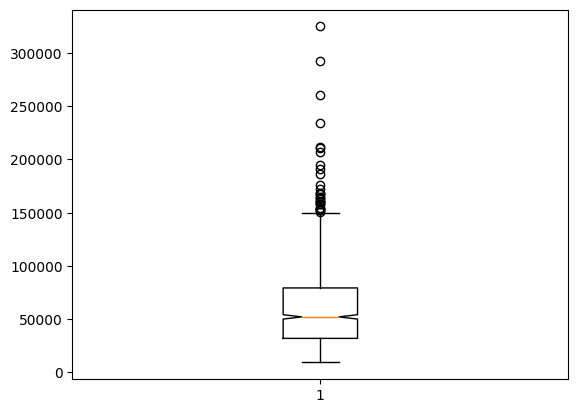

In [177]:
plt.boxplot(dataset["Price"] , notch = True)
plt.show()

In [ ]:
sns.boxplot(x=)